Regression
linear regression with 1 input/dependent variable
y = mx + b
with multiple input variable
polynomial regression
y= bo + b1x1 + b2x2

when we want to remove unwanted features for multiple input variable we use regulaization
1. Ridge - shrinks the coefficients by the same factor but doesnt eliminate any of the coefficients
2. Lasso - Shrinks the data values toward the mean and will make the model sparser 
3. Elastic Net - Combination of Ridge and Lasso

Regression algorithms
1. Random forest
2. Support vector machine
3. Gradient boosting
4. Neural networks

## Predictions: Regression for Car Mileage and Diamond Price


## Datasets

In this lab you will be using dataset(s):

 - Modified version of car mileage dataset. Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg 
 - Modified version of diamonds dataset. Available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active

In [2]:
!pip install pandas==1.3.4
!pip install scikit-learn==1.0.2
!pip install numpy==1.21.6

     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/4.7 MB 131.3 kB/s eta 0:00:36
     ---------------------------------------- 0.0/4.7 MB 178.6 kB/s eta 0:00:27
     ---------------------------------------- 0.1/4.7 MB 201.8 kB/s eta 0:00:24
      --------------------------------------- 0.1/4.7 MB 368.6 kB/s eta 0:00:13
     -- ------------------------------------- 0.3/4.7 MB 999.9 kB/s eta 0:00:05
     ----- ---------------------------------- 0.6/4.7 MB 1.7 MB/s eta 0:00:03
     -------- ------------------------------- 1.1/4.7 MB 2.7 MB/s eta 0:00:02
     ----------- ---------------------------- 1.4/4.7 MB 3.1 MB/s eta 0:00:02
     -------------- ------------------------- 1.8/4.7 MB 3.7 MB/s eta 0:00:01
     ------------------ --------------------- 2.2/4.7 MB 4.3 MB/s eta 0:00:

  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [2474 lines of output]
      <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\pandas
      copying pandas\conftest.py -> build\lib.win-amd64-cpython-311\pandas
      copying pandas\testing.py -> build\lib.win-amd64-cpython-311\pandas
      copying pandas\_typing.py -> build\lib.win-amd64-cpython-311\pandas
      copying pandas\_version.py -> build\lib.win-amd64-cpython-311\pandas
      copying pandas\__init__.py -> build\lib.win-amd64-cpython-311\pandas
      creating build\lib.win-amd64-cpython-311\pandas\api
      copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-311\pandas\a

     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     - -------------------------------------- 0.3/6.7 MB 8.6 MB/s eta 0:00:01
     --- ------------------------------------ 0.6/6.7 MB 7.6 MB/s eta 0:00:01
     ----- ---------------------------------- 0.9/6.7 MB 7.0 MB/s eta 0:00:01
     --------- ------------------------------ 1.6/6.7 MB 9.3 MB/s eta 0:00:01
     ------------ --------------------------- 2.1/6.7 MB 9.7 MB/s eta 0:00:01
     ----------------- ---------------------- 2.9/6.7 MB 10.2 MB/s eta 0:00:01
     ------------------- -------------------- 3.2/6.7 MB 9.8 MB/s eta 0:00:01
     --------------------- ------------------ 3.6/6.7 MB 9.6 MB/s eta 0:00:01
     ------------------------ --------------- 4.1/6.7 MB 9.4 MB/s eta 0:00:01
     ---------------------------- ----------- 4.7/6.7 MB 10.0 MB/s eta 0:00:01
     ------------------------------ --------- 5.1/6.7 MB 9.9 MB/s eta 0:00:01
     ------------------------------- -------- 5.2/6.7 MB 9.5 MB/s eta

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [66 lines of output]
      Partial import of sklearn during the build process.
      setup.py:128: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.command.build_ext import build_ext  # noqa
      INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      Traceback (most recent call last):
        File "c:\Users\shashi kiran\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in

In [3]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

## Task 1 - Load the data in a csv file into a dataframe


In [5]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

In [6]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
277,27.5,4,134.0,95,2560,14.2,78,Japanese
346,30.0,4,135.0,84,2385,12.9,81,American
315,30.0,4,146.0,67,3250,21.8,80,European
111,18.0,6,225.0,105,3121,16.5,73,American
198,26.5,4,140.0,72,2565,13.6,76,American


In [7]:
df.shape

(392, 8)

Let's create a scatter plot of Horsepower versus mileage(MPG) . This will help us visualize the relationship between them.


<Axes: xlabel='Horsepower', ylabel='MPG'>

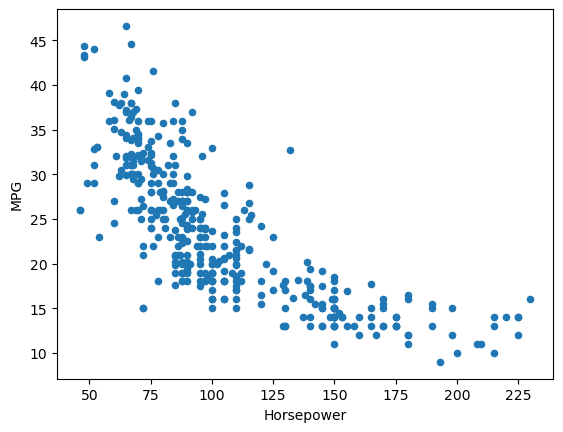

Identify the target column and the data columns
First we identify the target. Target is the value that our machine learning model needs to predict


In [9]:
target = df["MPG"]

We identify the features next. Features are the values our machine learning model learns from


In [10]:
features = df[["Horsepower","Weight"]]

## Build and Train a Linear Regression Model
Create a LR model

In [11]:
lr = LinearRegression()

Train/Fit the model


In [12]:
lr.fit(features,target)

LinearRegression()

## Evaluate the model and make predictions

Your model is now trained. Time to evaluate the model.


In [13]:
#Higher the score, better the model.
lr.score(features,target)

0.7063752737298348

Make predictions. Let us predict the mileage for a car with HorsePower = 100 and Weight = 2000


In [14]:
lr.predict([[100,2000]])

array([29.3216098])

29.3216098 miles per gallon is the mileage of a car with HorsePower = 100 and Weight = 2000

# Exercises


In [15]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

In [16]:
df2 = pd.read_csv(URL2)

In [17]:
df2.sample(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
18636,18637,1.20,Good,G,VS2,63.3,58.0,7603,6.66,6.74,4.24
8131,8132,1.01,Premium,E,SI2,62.5,60.0,4355,6.39,6.42,4.00
25600,25601,2.17,Premium,H,SI1,59.9,61.0,14452,8.39,8.38,5.02
16901,16902,1.21,Good,H,VS1,63.3,58.0,6748,6.72,6.77,4.27
45068,45069,0.55,Ideal,E,VS2,59.3,57.0,1643,5.39,5.43,3.21


In [18]:
target = df2["price"]
features = df2[["carat","depth"]]

In [19]:
lr2 = LinearRegression()
lr2.fit(features,target)

LinearRegression()

In [20]:
lr2.score(features,target)

0.8506754571636564

In [21]:
lr2.predict([[0.3,60]])

array([244.95605225])

# 244.95605225  is the price of a diamond with carat = 0.3 and depth = 60